<div class="alert alert-block alert-success">
<h1>Univariate Linear Regression - Russia GDP-Oil correlation</h1> 

- **Problem to solve:** Determine what role oil plays in the Russian economy and predict outcomes in the years to come.
    
**Data Information:** 
   - year (From 2004 to 2018)
   - oilprice (The spot price of a barrel (159 liters) of benchmark crude oil in US dollars
   - gpd (Gross domestic product in billions of US dollars

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the requierd libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv('gdprussia.csv')

In [3]:
#Let's take a look at the data

df

,year,oilprice,gdp
0,2018,71.06,1657.55
1,2017,54.25,1578.62
2,2016,43.55,1282.72
3,2015,52.35,1363.59
4,2014,99.03,2059.98
5,2013,108.56,2297.13
6,2012,111.63,2210.26
7,2011,111.27,2051.66
8,2010,79.47,1524.92
9,2009,61.51,1222.64


In [4]:
# Let's find out the correlation between the oilprice and gdp.

df.corr()

,year,oilprice,gdp
year,1.000000,0.110132,0.568187
oilprice,0.110132,1.000000,0.866744
gdp,0.568187,0.866744,1.000000


<div class="alert alert-block alert-info">

**Observation:**
Having a high linear correlation means that we can generally predict future values.

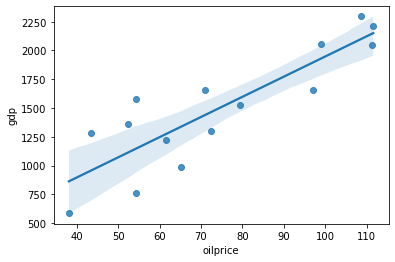

In [5]:
# Let's explore the relationship between the two variables.
# We plot the oil price on the X-axis and GPD on the Y-axis.

import seaborn as sns

sns.regplot(x = df['oilprice'], y = df['gdp']);

<div class="alert alert-block alert-info">

**Observation:**
There's a high positive correlation. The shape of the line appears straight; we can say there is a positive linear correlation between the oil price and gdp variables.

In [6]:
# Let's train our linear Regression Model

reg = linear_model.LinearRegression()
reg.fit(df[['oilprice']], df.gdp)

LinearRegression()

In [7]:
reg.predict(df[['oilprice']])

array([1440.70340204, 1146.33383843,  958.95999365, 1113.0618473 ,
       1930.50213461, 2097.38743748, 2151.14797052, 2144.84380378,
       1587.97574172, 1273.46786769, 1894.77852308, 1466.27030049,
       1337.03488232, 1148.61034308,  863.52191383])

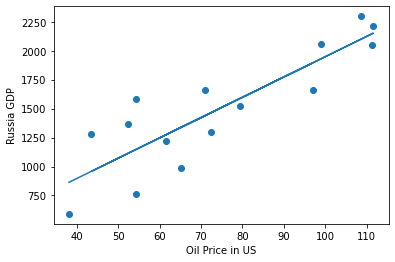

In [8]:
# Let's plot the prediction line

%matplotlib inline
plt.scatter(df.oilprice,df.gdp)
plt.xlabel('Oil Price in US')
plt.ylabel('Russia GDP')
plt.plot(df.oilprice,reg.predict(df[['oilprice']]));

In [9]:
reg.predict([[150]])

array([2823.06707557])

In [10]:
# Let's train our linear Regression Model to fit both variables.

reg = linear_model.LinearRegression()
reg.fit(df[['year','oilprice']], df.gdp)

LinearRegression()

In [11]:
# Getting the predicted values.

reg.predict(df[['year','oilprice']])

array([1825.72641   , 1494.79926769, 1264.36201447, 1354.63717327,
       2067.91675091, 2170.19806668, 2166.23311672, 2105.85567582,
       1528.39114601, 1178.55019478, 1707.62572039, 1250.71616391,
       1074.88225469,  843.45819405,  521.24785062])

In [12]:
# Let's compare the actual GDP versus the predicted GDP.

df_preds = pd.DataFrame({'Year': df['year'],'Actual GPD': df['gdp'],'Predicted GDP': reg.predict(df[['year','oilprice']])})
print(df_preds)

    Year  Actual GPD  Predicted GDP
0   2018     1657.55    1825.726410
1   2017     1578.62    1494.799268
2   2016     1282.72    1264.362014
3   2015     1363.59    1354.637173
4   2014     2059.98    2067.916751
5   2013     2297.13    2170.198067
6   2012     2210.26    2166.233117
7   2011     2051.66    2105.855676
8   2010     1524.92    1528.391146
9   2009     1222.64    1178.550195
10  2008     1660.85    1707.625720
11  2007     1299.71    1250.716164
12  2006      989.93    1074.882255
13  2005      764.02     843.458194
14  2004      591.02     521.247851


In [13]:
# What would be Russian GDP if, in 2023, the oil price is $125.95?

reg.predict([[2023,125.95]])

array([3000.7737147])

### Since the dataset goes up to 2018, let's test the accuracy with the years 2019, 2020 and 2021.

In [14]:
# Data gotten from:
# https://www.macrotrends.net/1369/crude-oil-price-history-chart
# https://www.macrotrends.net/countries/RUS/russia/gdp-gross-domestic-product

current_data = {'Year':['2021','2020','2019'],'Actual GDP':[1775.80,1488.32,1657.33], 'Oil Price':[68.17,38.68,56.99]}
df_predict = pd.DataFrame(current_data)
df_predict

,Year,Actual GDP,Oil Price
0,2021,1775.80,68.17
1,2020,1488.32,38.68
2,2019,1657.33,56.99


In [15]:
# Let's compare the actual and predicted GDP using our trained model.

df_preds = pd.DataFrame({'Year': df_predict['Year'],'Actual GPD': df_predict['Actual GDP'],'Predicted GDP': reg.predict(df_predict[['Year','Oil Price']])})
print(df_preds)

   Year  Actual GPD  Predicted GDP
0  2021     1775.80    1941.564975
1  2020     1488.32    1402.092531
2  2019     1657.33    1648.776666


<div class="alert alert-block alert-info">
    
**Observation:**
The model is precise for the 2019 and 2020 years; the difference between the actual GDP and the predicted is minimal. For the year 2021, a different model should be analyzing, a model that takes into consideration world events that happened during that year.